Итак, мы обучили модель машинного обучения, развернули ее в продакшне, она работает и отдаёт бизнесу предсказания. Как оценивать ее эффективность? Как выбирать метрики в зависимости от решаемого кейса? Как модель влияет на итоговые показатели?

Для примера возьмём задачу предотвращения оттока клиентов в телекоммуникационной компании. Наша задача — выявлять клиентов в группе риска, чтобы затем компания вовремя предлагала им скидку.

Для начала вспомним, что такое матрица ошибок.

Как вы помните, False Positive является ошибкой первого рода — когданаш алгоритм предсказывает, что объект относится к положительному классу, но таковым не является. 

False Negative, в свою очередь, относится к ошибкам второго рода — когда алгоритм объекту положительного класса присваивает отрицательную метку. 

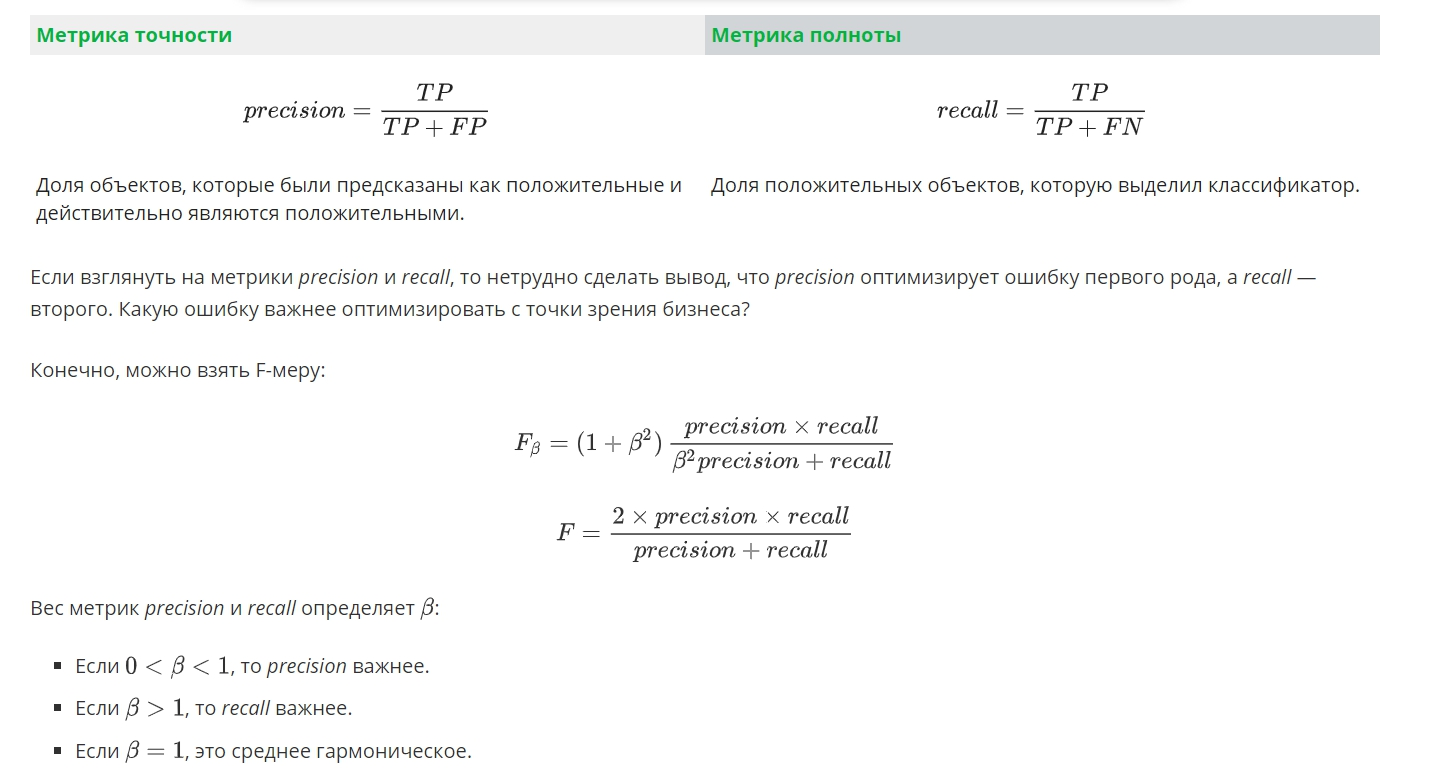

Примечание. F-мера достигает максимума при precision и recall, равных единице, и близка к нулю, если один из аргументов близок к нулю.

Вопрос в том, как выбрать beta. Давайте определимся с ценой ошибки.

Ошибиться с предсказанием собирающегося уйти от нас клиента означает потерять выручку, соответствующую его LTV. Метрика Lifetime Value (пожизненная ценность клиента) определяется бизнесом. Очевидно, что ценность LTV гораздо выше предоставленной скидки, а значит и оптимизация recall важнее. 

Если рассуждать дальше, то True Positive тоже стоит денег: мы дадим клиенту скидку и тем самым уменьшим его LTV. В случае с True Negative мы ничего не теряем и сохраняем LTV клиента. То есть метрика для оптимизации на самом деле выглядит так: 

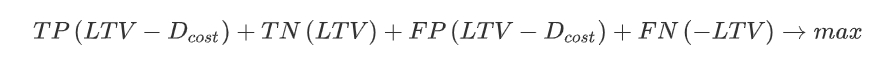

Однако и здесь стоит дополнительно оценивать вероятность того, что после предоставления скидки клиент действительно решит остаться.  

Перед нами стоит задача предсказания внеплановой поломки парогазовой турбины в ближайшее окно времени. Если шанс поломки есть, то это повлечет за собой превентивный ремонт.

Представим, что мы решили задачу и получили на валидации такую матрицу ошибок:

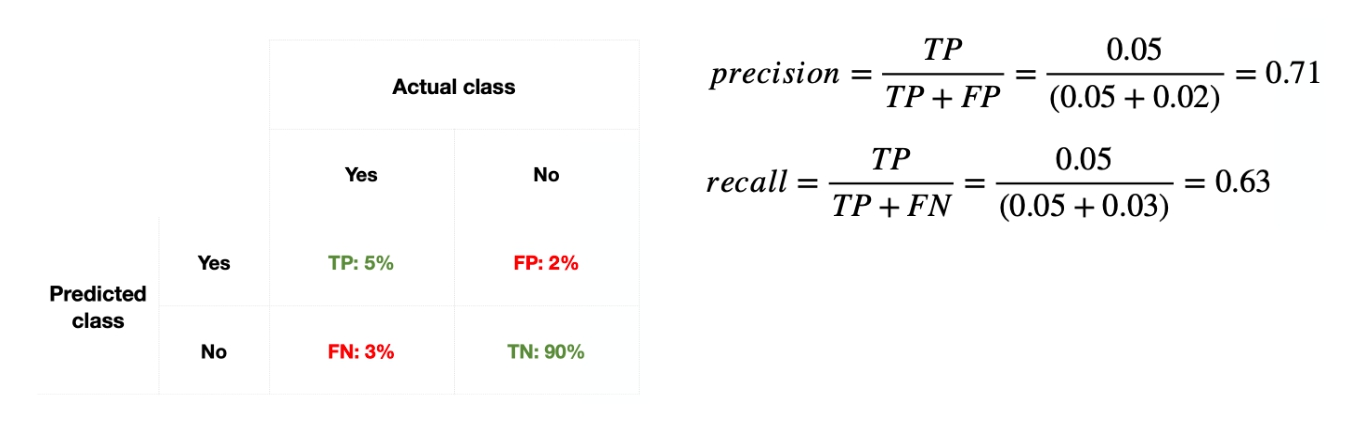

Мы завернули нашу модель в веб-сервис, упаковали всё в контейнер и развернули в продакшене. Спустя какое-то время нам стало интересно, что у нас там происходит, и мы получили данные после периода эксплуатации. На них получили такую матрицу ошибок:

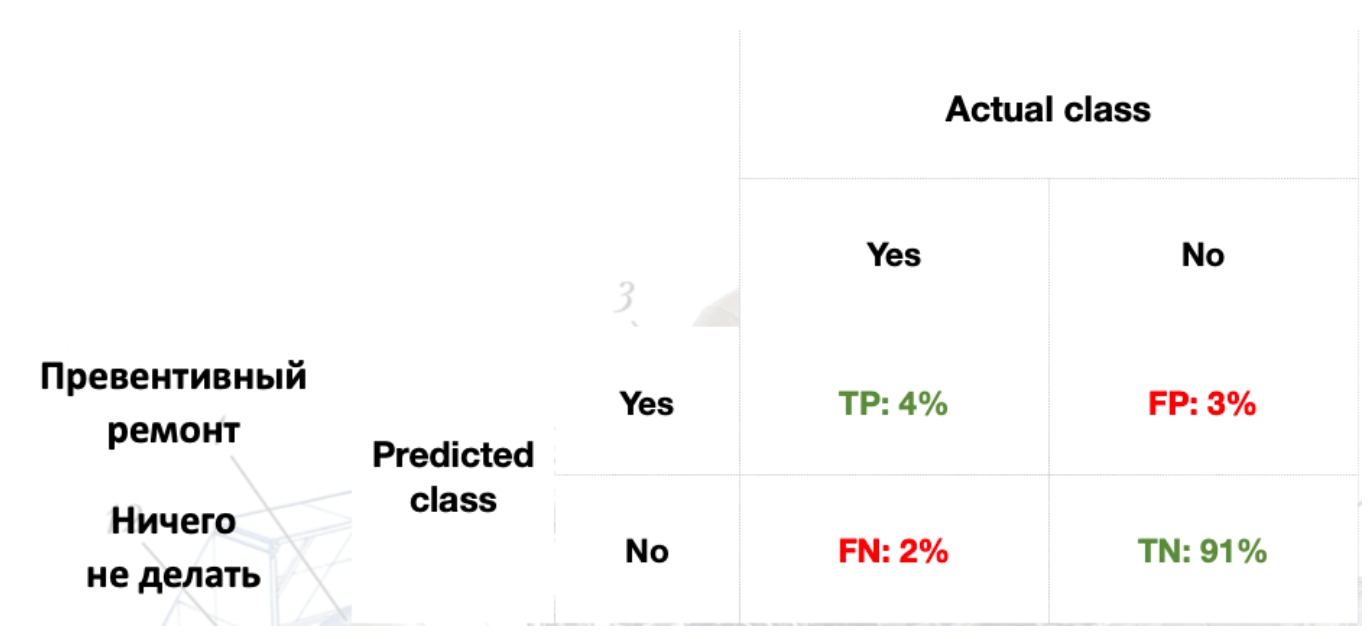

Кажется, что выглядит хуже, а если взглянуть на метрики, то значительно. 

По сути каждый раз, когда мы получали положительное предсказание, мы делали превентивный ремонт. Однако мы не можем утверждать, что поломка после него обязательно должна или не должна случиться. Более того, мы даже не можем это проверить! Если задуматься, то если ремонт сделан, то мы хотим, чтобы поломки не произошло, а значит на фактических данных False Positive будет расти за счёт уменьшения True Positive. 

БИЗНЕС-ЭФФЕКТ

Давайте взглянем с другой стороны: на эффект, который мы получили за счет внедрения нашего решения. 

Посмотрим на столбец Actual class на нашей валидационной выборке: сумма составляет 8 %. Именно столько случалось внеплановых ремонтов раньше. Если сложить этот же столбец в матрице после внедрения, то мы увидим 6 %, А значит, внеплановых ремонтов стало меньше на 2 %. Но какой же реальный эффект мы принесли бизнесу?

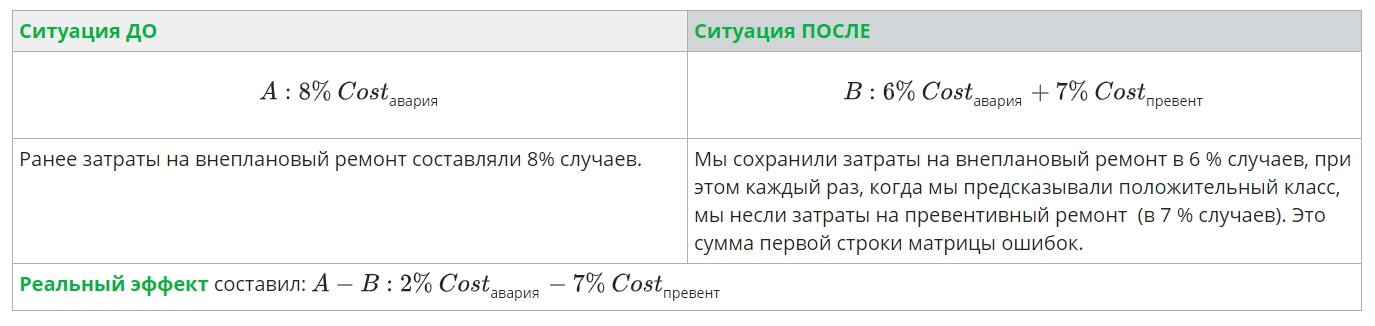

ROI

Теперь обратимся к экономике внедрения и оценим показатель ROI.

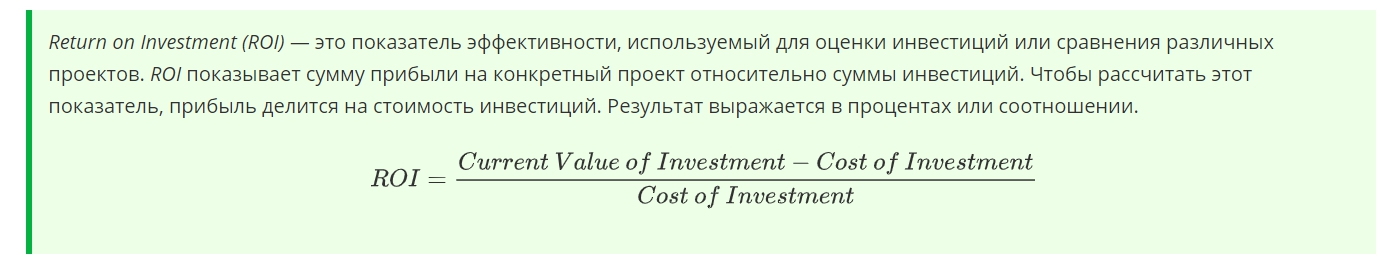

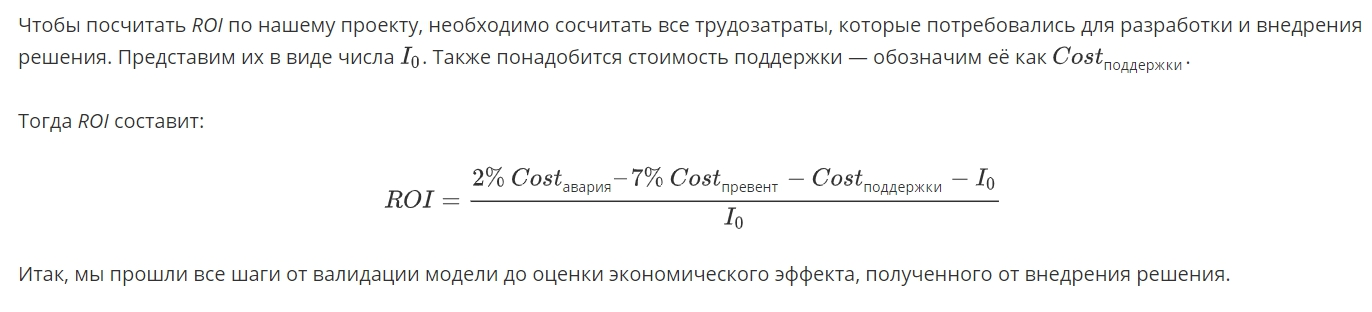

ИТОГИ

В этом блоке мы рассмотрели лишь некоторые подходы к тому, как оценивать эффективность работы моделей машинного обучения. Процесс определения качества моделирования достаточно специфичен для каждой области и непосредственно решаемой задачи. Основная концепция заключается в проведении классического А/B-теста, чтобы сравнить результаты до и после. 

Для того, чтобы грамотно провести эксперимент после внедрения модели, следует правильно его запланировать ещё на этапе постановки задачи, оценив бизнес-задачу и корректно выбрав метрики.